# Import calculation data for vacancies

This is just an example, do not run the notebook!

In [1]:
from pynter.data.datasets import Dataset
from pynter.defects.utils import get_kumagai_correction_from_jobs
from pynter.defects.analysis import  DefectsAnalysis
from pynter.defects.entries import get_defect_entry_from_jobs
from pynter.data.jobs import VaspJob
from pynter.tools.utils import save_object_as_json, get_object_from_json
import numpy as np
from pymatgen.electronic_structure.dos import FermiDos

/nfshome/villa/anaconda3/lib/python3.7/site-packages/matgendb/__init__.py:26: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  d = yaml.load(f)


### Read the calculations Dataset

In [2]:
ds = Dataset.from_json('../data/vacancies-PBE-2x2x1-supercell.json')

In [3]:
job_bulk = VaspJob.from_json('../data/NN_Pbcm_pure_2x2x1_supercell.json')

In [4]:
ds.jobs_table(properties_to_display=['charge'])

,formula,group,nodes,is_converged,charge
job_name,,,,,
NN_Pbcm_Na-vacancy_q-1__1,Na31 Nb32 O96,Na-vacancy,/q-1/1-PBE-SCF,True,-1.0
NN_Pbcm_Na-vacancy_q-1__2,Na31 Nb32 O96,Na-vacancy,/q-1/2-PBE-OPT,True,-1.0
NN_Pbcm_Na-vacancy_q0__1,Na31 Nb32 O96,Na-vacancy,/q0/1-PBE-SCF,True,0.0
NN_Pbcm_Na-vacancy_q0__2,Na31 Nb32 O96,Na-vacancy,/q0/2-PBE-OPT,True,0.0
NN_Pbcm_Na-vacancy_q1__1,Na31 Nb32 O96,Na-vacancy,/q1/1-PBE-SCF,True,1.0
NN_Pbcm_Na-vacancy_q1__2,Na31 Nb32 O96,Na-vacancy,/q1/2-PBE-OPT,True,1.0
NN_Pbcm_Nb-vacancy_q-1__1,Na32 Nb31 O96,Nb-vacancy,/q-1/1-PBE-SCF,True,-1.0
NN_Pbcm_Nb-vacancy_q-1__2,Na32 Nb31 O96,Nb-vacancy,/q-1/2-PBE-OPT,True,-1.0
NN_Pbcm_Nb-vacancy_q-2__1,Na32 Nb31 O96,Nb-vacancy,/q-2/1-PBE-SCF,True,-2.0


### Create Defect entries

The more convenient way is to use the `get_defect_entry_from_jobs` method, which creates a `SingleDefectEntry` or a `DefectComplexEntry` object starting from the `VaspJob` objects of the defect and the pure structure. Starting from the structures the defect sites are identified. In this case we have vacancies, so the `SingleDefectEntry` objects are creating, storing the information on the defect site and type of defect, charge, energy and multiplicity. 
In this example the Kumagai corrections are included using `pymatgen`. Since setting up the corrections in pymatgen is a relatively long task, it's recommended to use the `get_kumagai_correction_from_jobs` method from the `pynter.defects.utils` module, which sets up automatically the pymatgen objects starting from the jobs of the defect and pure structure and the dielectric tensor.

NN_Pbcm_Na-vacancy_q-1__2 kumagai corr:0.25172491962622945


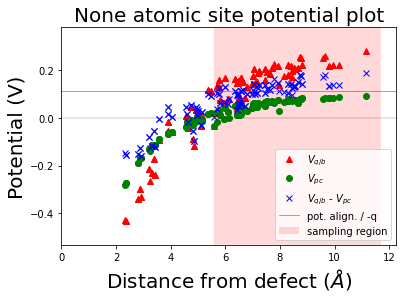

NN_Pbcm_Na-vacancy_q0__2 kumagai corr:0.0


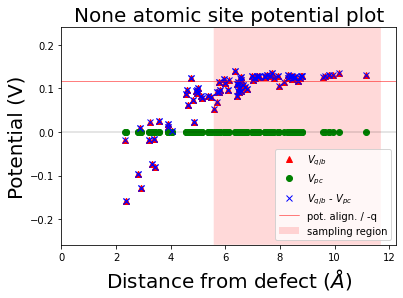

NN_Pbcm_Na-vacancy_q1__2 kumagai corr:-0.022006811143000488


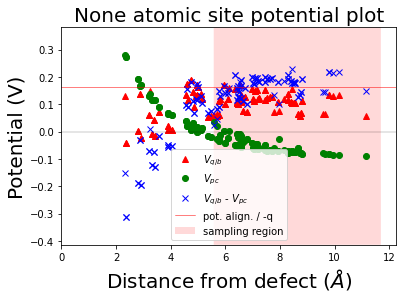

NN_Pbcm_Nb-vacancy_q-1__2 kumagai corr:0.31505252853542076


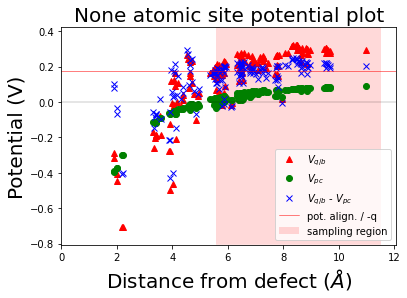

NN_Pbcm_Nb-vacancy_q-2__2 kumagai corr:0.9366742650850792


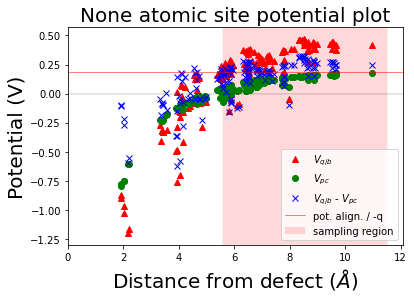

NN_Pbcm_Nb-vacancy_q-3__2 kumagai corr:1.8661670964414272


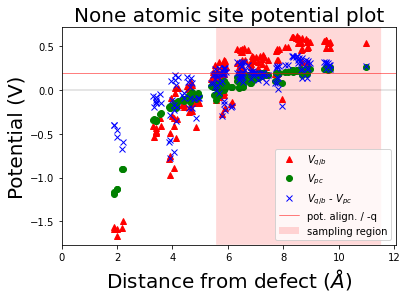

NN_Pbcm_Nb-vacancy_q-4__2 kumagai corr:3.0622178150572985


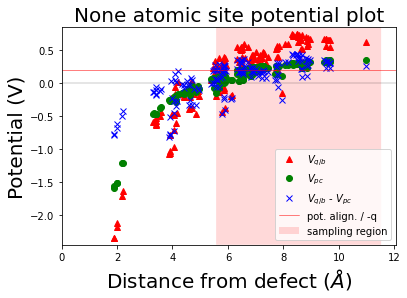

NN_Pbcm_Nb-vacancy_q-5__2 kumagai corr:4.290567930366653


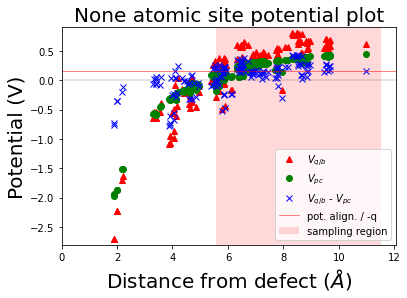

NN_Pbcm_Nb-vacancy_q0__2 kumagai corr:0.0


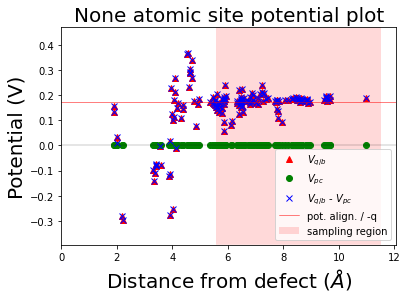

NN_Pbcm_O-vacancy_q-1__2 kumagai corr:0.08352527322402208


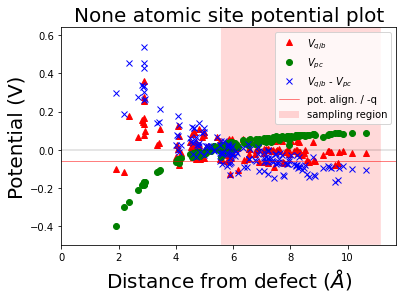

NN_Pbcm_O-vacancy_q-2__2 kumagai corr:0.3356657987784416


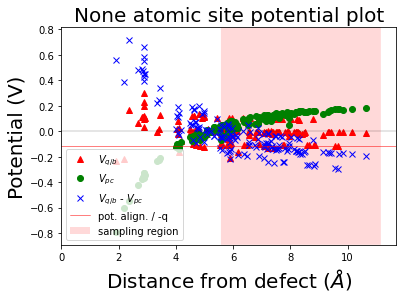

NN_Pbcm_O-vacancy_q0__2 kumagai corr:0.0


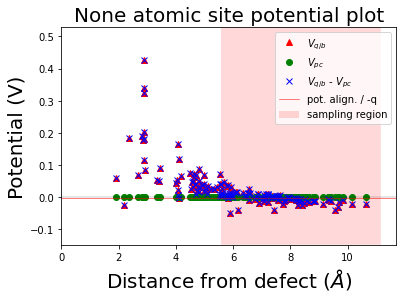

NN_Pbcm_O-vacancy_q1__2 kumagai corr:0.15686841047892433


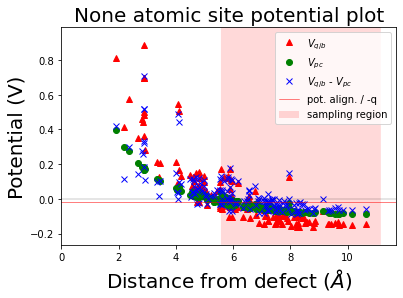

NN_Pbcm_O-vacancy_q2__2 kumagai corr:0.6712814850529523


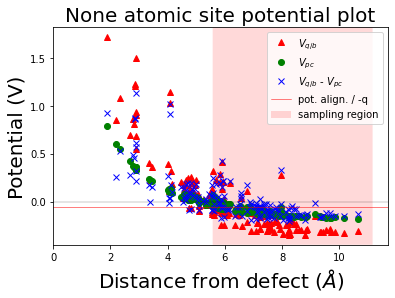

In [10]:
epsilon = np.array([[11.28,0,0],[0,10.54,0],[0,0,11.96]])

entries = []
for group in ds.groups:
    jobs = ds.select_jobs(groups=[group])
    for j in ds.select_jobs(jobs,common_node='2-PBE-OPT'):
        j_initial = ds.select_jobs(groups=[group],common_node='1-PBE-SCF',charge=j.charge)
        corr,plt = get_kumagai_correction_from_jobs(j_initial,job_bulk,epsilon,get_plot=True)
        kumagai_corr = sum([v for v in corr.values()])
        
        print(j.name,f'kumagai corr:{kumagai_corr}')
        corrections = {'kumagai':kumagai_corr}
        plt.show()
        
        entry = get_defect_entry_from_jobs(j,job_bulk,corrections=corrections,
                                           defect_structure=j_initial.initial_structure,multiplicity=None)
        entries.append(entry)

In [11]:
entries

[SingleDefectEntry :
 Defect = Vacancy Na [0.12908496 0.125      0.        ]
 Bulk System = Na32 Nb32 O96
 Energy = 6.8970
 Corrections = 0.2517
 Charge = -1
 Multiplicity = 16
 Name = Vac_Na_mult16
 ,
 SingleDefectEntry :
 Defect = Vacancy Na [0.12908496 0.125      0.        ]
 Bulk System = Na32 Nb32 O96
 Energy = 5.6030
 Corrections = 0.0000
 Charge = 0
 Multiplicity = 16
 Name = Vac_Na_mult16
 ,
 SingleDefectEntry :
 Defect = Vacancy Na [0.12908496 0.125      0.        ]
 Bulk System = Na32 Nb32 O96
 Energy = 4.3408
 Corrections = -0.0220
 Charge = 1
 Multiplicity = 16
 Name = Vac_Na_mult16
 ,
 SingleDefectEntry :
 Defect = Vacancy Nb [0.12134584 0.36030877 0.12522169]
 Bulk System = Na32 Nb32 O96
 Energy = 28.2772
 Corrections = 0.3151
 Charge = -1
 Multiplicity = 32
 Name = Vac_Nb_mult32
 ,
 SingleDefectEntry :
 Defect = Vacancy Nb [0.12134584 0.36030877 0.12522169]
 Bulk System = Na32 Nb32 O96
 Energy = 29.4773
 Corrections = 0.9367
 Charge = -2
 Multiplicity = 32
 Name = Vac_Nb

In [12]:
job_dos = VaspJob.from_directory('/nfshome/villa/local-data/NN_Pbcm/DOS-BS/PBE/2-PBE-DOS')
job_dos.get_output_properties(data=['complete_dos'])

/nfshome/villa/anaconda3/lib/python3.7/site-packages/pymatgen/io/vasp/inputs.py:1843: UnknownPotcarWarning: POTCAR with symbol Na_pv has metadata that does not match                          any VASP POTCAR known to pymatgen. The data in this                          POTCAR is known to match the following functionals:                          ['PBE_52', 'PBE_54', 'unvie_PBE_52']
  UnknownPotcarWarning)
/nfshome/villa/anaconda3/lib/python3.7/site-packages/pymatgen/io/vasp/inputs.py:1843: UnknownPotcarWarning: POTCAR with symbol Nb_pv has metadata that does not match                          any VASP POTCAR known to pymatgen. The data in this                          POTCAR is known to match the following functionals:                          ['PBE_52', 'PBE_54', 'unvie_PBE_52']
  UnknownPotcarWarning)
/nfshome/villa/anaconda3/lib/python3.7/site-packages/pymatgen/io/vasp/inputs.py:1843: UnknownPotcarWarning: POTCAR with symbol O has metadata that does not match                          a

In [14]:
band_gap, cbm, vbm, is_band_gap_direct = job_bulk.computed_entry.data['eigenvalue_band_properties']

### Save DefectsAnalysis object as json

Create the `DefectsAnalysis` object using the entries as input. Also the VBM position and the band gap of the pure structure are needed.

In [15]:
defect_analysis = DefectsAnalysis(entries,vbm,band_gap)

In [16]:
save_object_as_json(defect_analysis,'../data/defect_analysis_vacancies_updated_new.json')